<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21418C" size=8px>
                    <b> MINI PROJECT 2 - Python for Data Science <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Few things before you do the project:

    1. Be creative. 

    2. Write inferences wherever needed. Explain your understanding of the results/plots generated. Also, explain your reason behind choosing to apply a particular technique or process. 

    3. Submit the report in the '.pdf' or '.doc' format along with your python notebook. 
    
    4. Make sure no lines/plots are cut off while converting to pdf format.  
    
    5. Plagiarism is strictly prohibited. 

In [6]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Read the dataset 'pokemon.csv'. What do you understand from the dataset? [2 marks]

In [89]:
df_pokemon = pd.read_csv("MiniProject2_Pokemon.csv")
df_pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Reading the csv file and saving it as a dataframe in df_pokemon
# Displaying first 5 records
# The dataset contains details about different pokemons and their types, 
# attack, defense, speed & generation

2. List the columns in the dataframe.    [1 mark]

In [91]:
for col in df_pokemon:
    print(col)

#
Name
Type 1
Type 2
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed
Generation
Legendary


In [ ]:
# The columns present in df_pokemon dataframe listed using looping statements

3. Drop the column '#'.     [1 mark]

In [93]:
drp_pokemon = df_pokemon.copy(deep = True) #copying list
drp_pokemon = drp_pokemon.drop('#', axis = 1) #droping '#' column
drp_pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Dropped '#' column using drop func & first 5 row records displayed for verification

4. Check if the dataset has null values. [1 mark]

In [95]:
df_pokemon.isnull().sum()

Total = df_pokemon.isnull().sum().sort_values(ascending=False)
Percent = df_pokemon.isnull().sum() * 100 / df_pokemon.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage_of_missing_Values'])

missing_data.head(5)

,Total,Percentage_of_missing_Values
Type 2,386,48.25
#,0,0.00
Name,0,0.00
Type 1,0,0.00
Total,0,0.00


In [ ]:
# Total of missing values
# % of missing values
# From the below table we could find that only Type 2 column has 386 missing values / null values

5. Drop the records with null values. Do you think dropping the missing values is a right option here? If not, what can be done? [2 marks]

In [ ]:
# From the above displayed table its evident that almost 50% entries are missing from Type 2 column
# Type 1 & Type 2 columns refers to pokemon abilities some have single ability and some has dual ability
# So, dropping those records would influence the data provided, hence we could fill those missing values

In [46]:
df_pokemon['Type 2'].fillna('N/A', inplace = True)
# Filling missing values as N/A

In [97]:
df_pokemon.isnull().sum()

Total = df_pokemon.isnull().sum().sort_values(ascending=False)
Percent = df_pokemon.isnull().sum() * 100 / df_pokemon.isnull().count().sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage_of_missing_Values'])

missing_data.head(5)

,Total,Percentage_of_missing_Values
Type 2,386,48.25
#,0,0.00
Name,0,0.00
Type 1,0,0.00
Total,0,0.00


6. Remove duplicate records if any. [1 mark]

In [52]:
rows_before_drop = len(df_pokemon)
df_pokemon = df_pokemon.drop_duplicates() # dropping duplicates
rows_after_drop = len(df_pokemon)

print('Number of records before dropping duplicates: ', rows_before_drop)
print('Number of records after dropping duplicates: ', rows_after_drop)

Number of records before dropping duplicates:  800
Number of records after dropping duplicates:  800


7. Which is the most frequent pokemon type (type 2) for every type of pokemon in type 1.  [1 mark]

Hint: Use groupby. 
        


In [99]:
common_Pokemon = df_pokemon.groupby('Type 1')['Type 2'].agg(pd.Series.mode) #Groupping pokemon respective to their types
print(common_Pokemon) #Printing common type 2 for every type 1 pokemon     

Type 1
Bug                  Flying
Dark                 Flying
Dragon               Flying
Electric             Flying
Fairy                Flying
Fighting            Psychic
Fire               Fighting
Flying               Dragon
Ghost                 Grass
Grass                Poison
Ground               Flying
Ice         [Ground, Water]
Normal               Flying
Poison       [Dark, Flying]
Psychic     [Fairy, Flying]
Rock        [Ground, Water]
Steel               Psychic
Water                Ground
Name: Type 2, dtype: object


8. Find the average defense value and attack value of the pokemons. How did you choose which measure of central tendency to use? [2 marks]

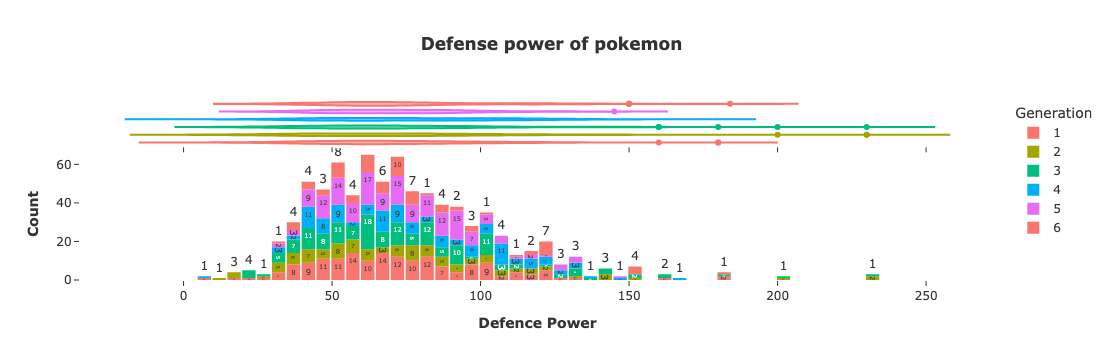

In [101]:
#Creating charrt object

import plotly.express as px
fig_histogram = px.histogram(df_pokemon,
                             x = df_pokemon['Defense'],
                             marginal = 'violin',
                             text_auto = True,
                             color = 'Generation',
                             template = 'ggplot2',
                             title = '<b>Defense power of pokemon</b>'
                            )

#Add axis titles & spacing
fig_histogram.update_layout(
    xaxis_title = '<b>Defence Power</b>',
    yaxis_title = '<b>Count</b>',
    bargap = 0.1
)

#Make the background transparent
fig_histogram.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

#Display the chart
fig_histogram.show()
                             

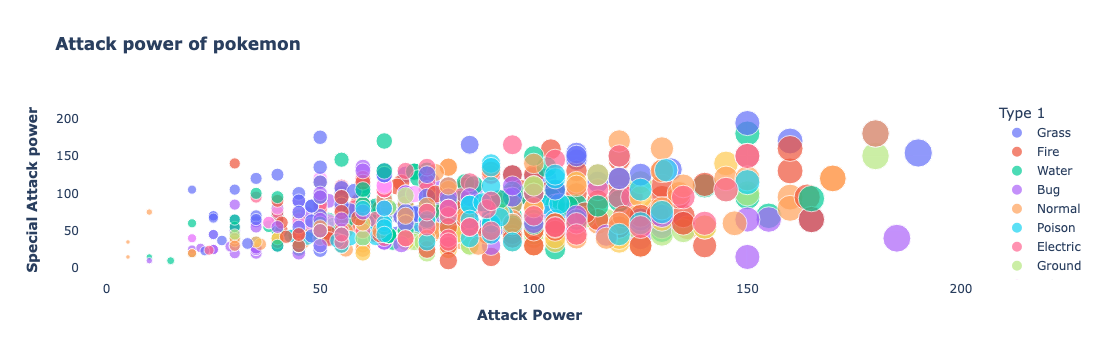

In [103]:
fig_attack_scatter = px.scatter(
    df_pokemon,                             # DataFrame containing all Pokémon stats
    x=df_pokemon['Attack'],                 # Plots Attack on the X-axis
    y=df_pokemon['Sp. Atk'],                # Plots Special Attack on the Y-axis
    size=df_pokemon['Attack'],              # Bubble size based on Attack value
    color=df_pokemon['Type 1'],             # Colors bubbles based on primary type
    template='plotly',                   # Uses Plotly’s default styling theme
    title="<b>Attack power of pokemon</b>"  # Sets a bolded chart title
)

fig_attack_scatter.update_layout(
    xaxis_title='<b>Attack Power</b>',          # Bold label for X-axis
    yaxis_title='<b>Special Attack power</b>'   # Bold label for Y-axis
)

fig_attack_scatter.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',   # Transparent chart background
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'   # Transparent overall canvas background
})

fig_attack_scatter.show()

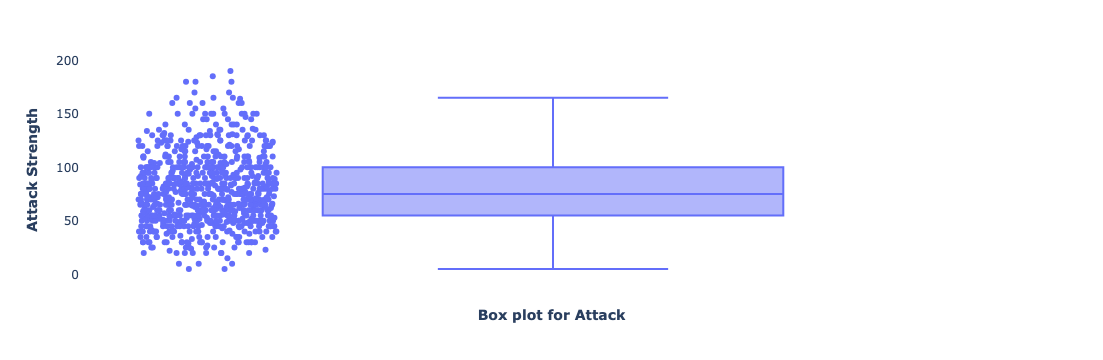

In [105]:
fig_attack_box = px.box(
    df_pokemon,                 
    y=df_pokemon['Attack'],        
    points='all'           
)

fig_attack_box.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',    
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'    
},
xaxis_title='<b>Box plot for Attack</b>', 
yaxis_title='<b>Attack Strength</b>'     
)

fig_attack_box.show()

In [ ]:
# From the above plots it is evident that Defense & Attack columns are positively skewed and has some outliers
# Since the records are Interval/Ratio (skewed); median is the best measure of central tendency

In [107]:
pok_defense = df_pokemon['Defense'].median()
pok_attack = df_pokemon['Attack'].median()
print('Average attack power   : ', pok_attack)
print('Average defense power  : ', pok_defense)
# Calculating average defense and attack power of pokemons
# Displaying average defense and attack power of pokemons

Average attack power   :  75.0
Average defense power  :  70.0


9. What is the maximum 'total' of the pokemons? List only the name of pokemons with top 5 total values. [2 marks]

In [124]:
# .max() gets the maximum value from the 'Total' column.
max_Total = df_pokemon['Total'].max()
print('Maximum value of Total: ', max_Total) 


# Sorts Pokémon by their total strength and sets up tracking.
# .sort_values() puts strongest Pokémon at the top.   
total = df_pokemon['Total'].sort_values(ascending = False)
name = df_pokemon['Name']
temp_total = total.max()
total_arr = []
temp = 1

# Appends top 5 total values to total_arr.
# Manual loop with a counter (temp) keeping count.
for i in total:
    if temp <= 5:
        total_arr.append(i)
    else:
        total_arr.append(i)
        temp_total = i
        temp += 1

# Removes last value from the list and updates threshold variable a.
# Uses .pop() and indexing.
a = len(total_arr) - 1
total_arr.pop(a)
a = total_arr[-1]

# Filters Pokémon whose total stat is equal to or greater than a.
# Boolean indexing + .index extracts positions.
temp_pok = df_pokemon.sort_values(by='Total')
total_idx = temp_pok[temp_pok['Total'] >= a].index
name_arr = []

# Cross-references indexes to get matching names.
# Nested loop compares DataFrame index values.
for i in total_idx:
    for j in name.index:
        if i == j:
            name_arr.append(name[j])

# Converts lists into structured DataFrames
# pd.DataFrame() wraps lists into coulumn labels
df_total = pd.DataFrame(total_arr, columns = ['Top 5 total values'])
df_name = pd.DataFrame(name_arr, columns = ['Top 5 total names'])

# pd.concat() joins both DataFrames side by side
df_total['Top 5 total values'].sort_values(ascending = True)
Top_5 = pd.concat([df_total, df_name], axis = 1)

Top_5

Maximum value of Total:  780


,Top 5 total values,Top 5 total names
0,780,Azurill
1,780,Kricketot
2,780,Wurmple
3,770,Weedle
4,770,Caterpie
...,...,...
794,195,GroudonPrimal Groudon
795,195,KyogrePrimal Kyogre
796,195,MewtwoMega Mewtwo Y
797,194,RayquazaMega Rayquaza


In [126]:
# Finds the maximum and sorts Pokémon by total stat in descending order.
# Collects the top 5 total stat values into a list.
# Identifies names of Pokémon with total ≥ lowest top 5 value.
# Combines names and stat values into a final summary DataFrame.

10. Create a pivot table of your choice and explain why did you choose this. What do you infer from the pivot table? [4 marks]

In [141]:
df_pokemon.pivot_table('Generation', index='Legendary', columns='Type 1')
# Converting a pivot table for Generation feature

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Legendary,,,,,,,,,,,,,,,,,,
False,3.217391,3.965517,3.750000,3.275,4.0,3.37037,3.234043,6.0,4.2,3.313433,3.035714,3.681818,3.03125,2.535714,3.418605,3.3,3.869565,2.851852
True,NaN,5.000000,4.083333,3.250,6.0,NaN,3.000000,5.0,4.0,4.333333,4.000000,2.000000,4.00000,NaN,3.285714,5.0,3.750000,3.000000


<Axes: title={'center': 'Total with respect to Type 1 & Type 2'}, ylabel='Legendary'>

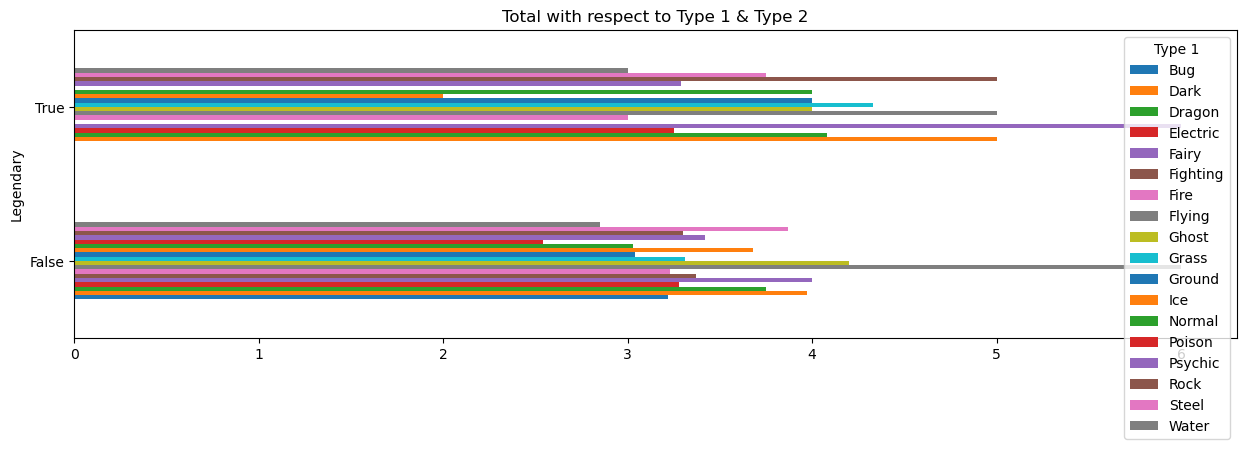

In [147]:
pivot = np.round(pd.pivot_table(df_pokemon, values = 'Generation', index='Legendary', columns='Type 1', 
                                aggfunc=np.mean, fill_value =0), 2).plot.barh(figsize=(15,4), 
                                                                              title = 'Total with respect to Type 1 & Type 2')
pivot
# plotting a pivot table details from above table for generation feature                                                                                                      

11. Plot a histogram for the feature 'Speed'. Which plot type do you think would be suitable for this feature? [2 marks]

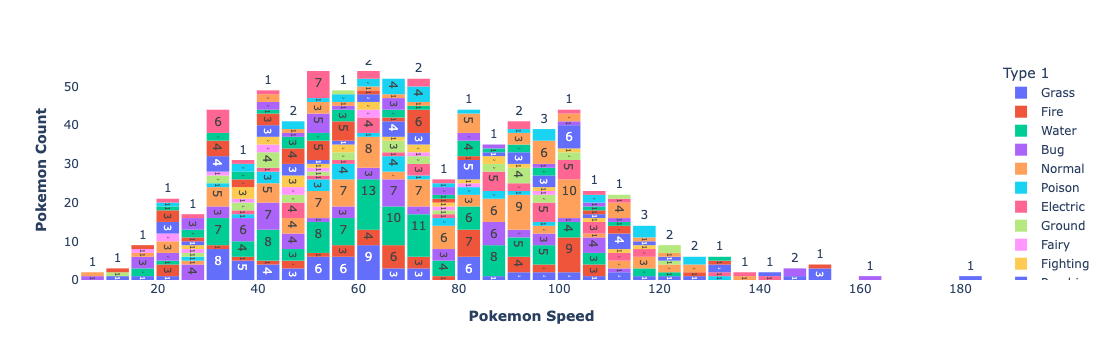

In [155]:
fig_Speed = px.histogram(df_pokemon, x=df_pokemon['Speed'], text_auto=True, color='Type 1')
fig_Speed.update_layout(xaxis_title='<b>Pokemon Speed</b>', yaxis_title='<b>Pokemon Count</b>', bargap=0.1)
fig_Speed.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', 'paper_bgcolor':'rgba(0,0,0,0)'})
fig_Speed.show()

# Histogram is used for speed with parameters as marginal = 'box', text_auto = True, color = 'Type 1'
# provided layout_details such as xaxis_title = Pokeman Speed, yaxis_title = Pokemon Count & bar graph width as 0.1
# from the below graph it is evident that distribution is positively skewed hence it must have outliers on the upper side

In [ ]:
# Line plot can be used to best visualize the speed of different pokemons
# Below is the line plot for speed of pokemon

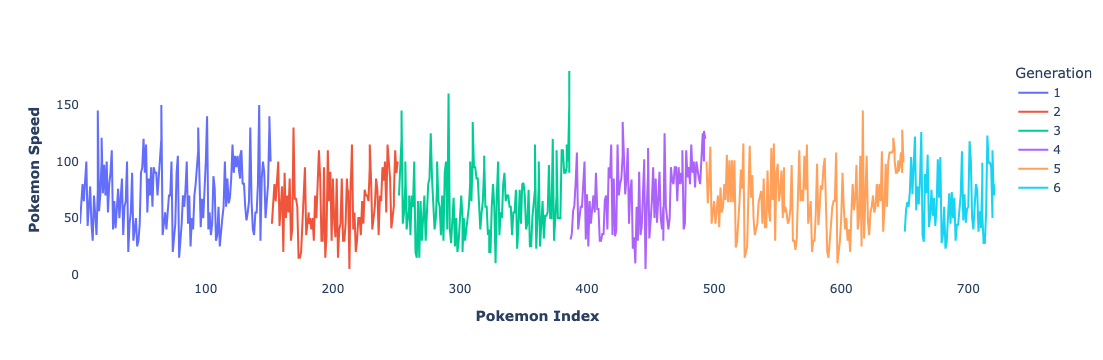

In [165]:
fig_Speed_Line = px.line(df_pokemon, x=df_pokemon['#'], y=df_pokemon['Speed'], color='Generation', hover_name=df_pokemon['Name'])
fig_Speed_Line.update_layout(xaxis_title='<b>Pokemon Index</b>', yaxis_title='<b>Pokemon Speed</b>', bargap=0.1)
fig_Speed_Line.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
fig_Speed_Line.show()


# Line plot is used for Speed column with parameters as hover_name = Name, color = Generation
# Providing layout details such as xaxis_title = Pokemon Index, yaxis_title = Pokemon Speed  
# Displaying the plot

12. Without removing null values, which type of pokemon would be most common in Type 1. Is it different from the data removing null values? [1 mark]

In [169]:
no_null_pokemon = df_pokemon.copy(deep=True) #Copying DataFrame
no_null_pokemon = no_null_pokemon.dropna() # Dropping records has null values

In [173]:
with_null = df_pokemon['Type 1'].value_counts(normalize=True) * 100
without_null = no_null_pokemon['Type 1'].value_counts(normalize=True) * 100
common_Type_1 = pd.concat([with_null, without_null], axis=1, 
                          keys=['Before removing NULL values', 'After removing NULL values'])
common_Type_1

,Before removing NULL values,After removing NULL values
Type 1,,
Water,14.000,12.801932
Normal,12.250,8.937198
Grass,8.750,8.937198
Bug,8.625,12.560386
Psychic,7.125,4.589372
Fire,6.500,5.797101
Electric,5.500,4.106280
Rock,5.500,8.454106
Dragon,4.000,5.072464


In [ ]:
# Before removing & after removing Null value records, the most common Type 1 pokemon is water with 12.80%

13. Plot a boxplot for the feature 'total' with respect to the feature 'Type 1'. What do you infer from the plot? [2 marks] 

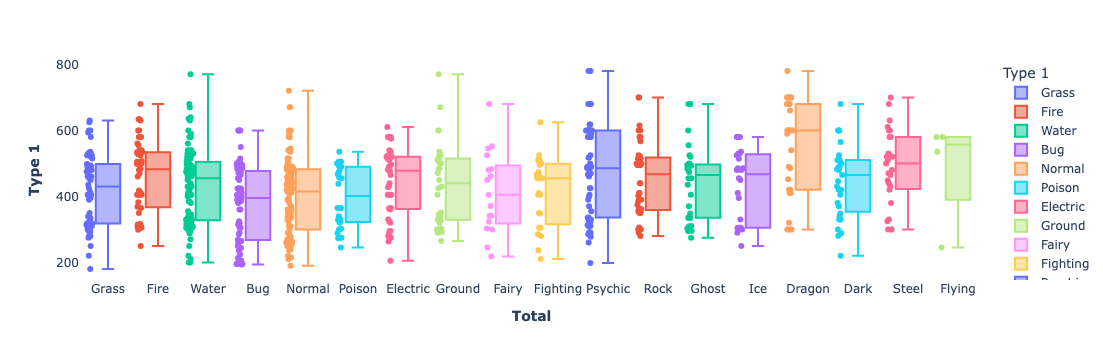

In [179]:
# Boxplots are used to plot feature Total with respect to the feature Type 1
# Some plots show outliers and some do not
fig_atk_box = px.box(df_pokemon, x=df_pokemon['Type 1'], y=df_pokemon['Total'], color=df_pokemon['Type 1'], points='all')
fig_atk_box.update_layout(xaxis_title='<b>Total</b>', yaxis_title='<b>Type 1</b>')
fig_atk_box.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', 'paper_bgcolor':'rgba(0,0,0,0)'})
fig_atk_box.show()


In [181]:
# From the plot it is evident that Water and Normal are the most common types of pokemon
# Psychic and Dragon has the max Total value while Grass has least Total value

14. Plot a scatter plot for the feature attack value and defense value, with respect to 'Type 2'. What are your observations? [2 marks]

In [ ]:
# Scatter plot that has both Attack and Defense Column as x-axis & Type 2 as y-axis

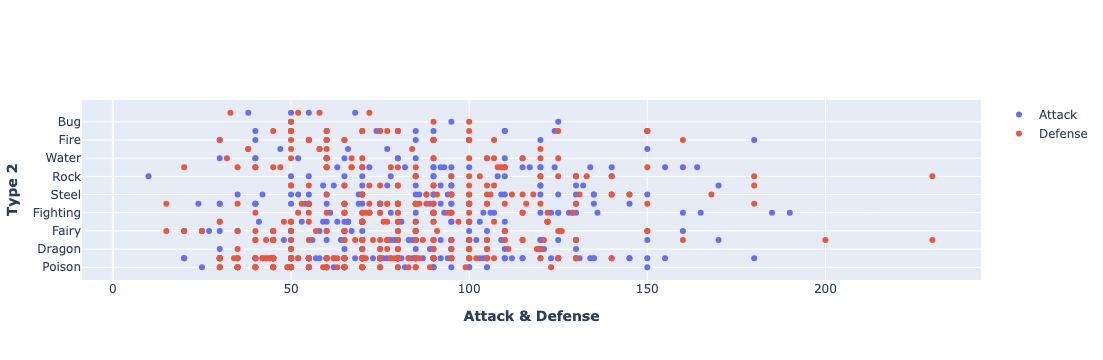

In [189]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig_scatter = make_subplots()
fig_scatter.add_trace(go.Scatter(name='Attack', x=df_pokemon['Attack'], y=df_pokemon['Type 2'], mode='markers+text'),)
fig_scatter.add_trace(go.Scatter(name='Defense', x=df_pokemon['Defense'], y=df_pokemon['Type 2'], mode='markers+text'),)
fig_scatter.update_layout(xaxis_title='<b>Attack & Defense</b>', yaxis_title='<b>Type 2</b>')
fig_atk_box.update_layout({'plot_bgcolor':'rgba(0,0,0,0)', 'paper_bgcolor':'rgba(0,0,0,0)'})
fig_scatter.show()

In [ ]:
# Above is the scatter plot for feature Attack & Defense value with respect to Type 2

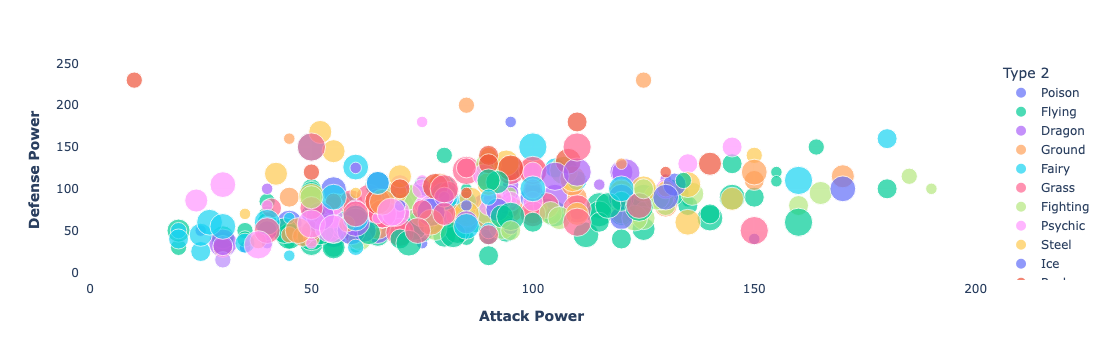

In [200]:
fig_atk_scatter = px.scatter(df_pokemon, x = df_pokemon['Attack'], y = df_pokemon['Defense'], size = df_pokemon['Generation'],
                        color = df_pokemon['Type 2'], template = 'plotly', hover_name = df_pokemon['Name'])
fig_atk_scatter.update_layout(xaxis_title = '<b>Attack Power</b>', yaxis_title = '<b>Defense Power</b>')
fig_atk_scatter.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
fig_atk_scatter.show()

In [ ]:
# Plotting the scatter plot
# Updating x-axis and y-axis titles
# Displaying the plot

In [202]:
# Use the below code to add regression line to the plot for every Type 2 

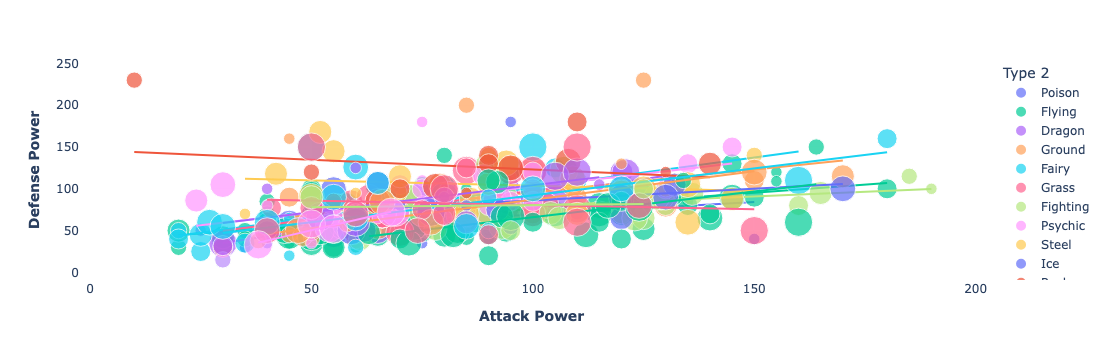

In [198]:
fig_atk_scatter = px.scatter(df_pokemon, x = df_pokemon['Attack'], y = df_pokemon['Defense'], size = df_pokemon['Generation'], 
                             color = df_pokemon['Type 2'], template = 'plotly', hover_name = df_pokemon['Name'], trendline = 'ols')
fig_atk_scatter.update_layout(xaxis_title = '<b>Attack Power</b>', yaxis_title = '<b>Defense Power</b>')
fig_atk_scatter.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
fig_atk_scatter.show()

In [204]:
# Plotly Express to fit a regression line using Ordinary Least Squares (OLS)
# a classic method for finding the best straight-line relationship between two variables.

16. Create subplots (at least 4) with different plots [lineplot, swarmplot, violinplot, barchart, etc.] of your choice. State the reasoning behind your choice. [4 marks]

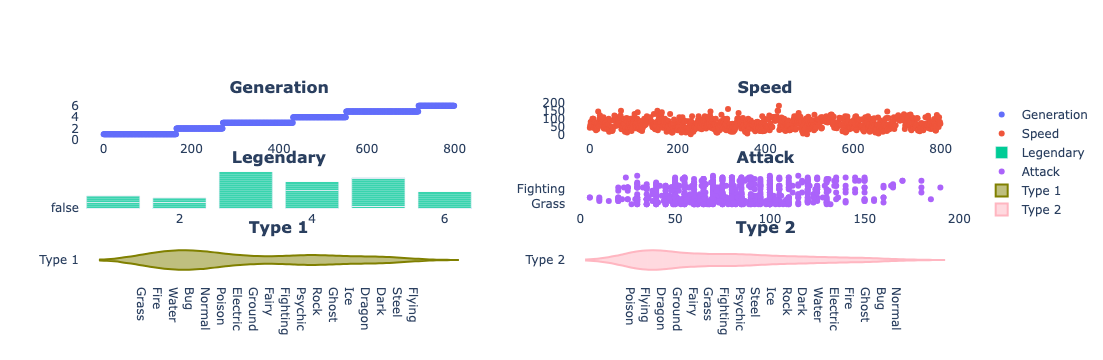

In [209]:
fig = make_subplots(rows = 3, cols = 2, specs = [[{'type': 'xy'}, {'type': 'xy'}],
                                                 [{'type': 'xy'}, {'type': 'xy'}],
                                                 [{'type': 'xy'}, {'type': 'xy'}]],
                    subplot_titles=("<b>Generation</b>", "<b>Speed</b>", "<b>Legendary</b>",
                                    "<b>Attack</b>", "<b>Type 1</b>", "<b>Type 2</b>"))
fig.add_traces([go.Scatter(name = 'Generation', y = df_pokemon['Generation'], mode = "markers+text"),
                go.Scatter(name = 'Speed', y = df_pokemon['Speed'], mode = "markers+text"),
                go.Bar(name = 'Legendary', x = df_pokemon['Generation'], y = df_pokemon['Legendary']), 
                go.Scatter(name = 'Attack', x = df_pokemon['Attack'], y = df_pokemon['Type 1'], mode = "markers+text"), 
                go.Violin(name = 'Type 1', x = df_pokemon['Type 1'], line_color = 'olive'),
                go.Violin(name = 'Type 2', x = df_pokemon['Type 2'], line_color = 'lightpink')], 
               rows=[1, 1, 2, 2, 3, 3], cols=[1, 2, 1, 2, 1, 2]) 
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'},)
fig.show()

In [ ]:
# Reasons behind selecting specific charts ->
# Scatter plots are used to show the relation/correlation between two features.
# Violin plot is used to find the distribution of the data in given dataset
# Bar plot is used to visualize two or more set of data present in dataset

17. Perform any two univariate, bivariate and multivariate Analysis on this dataset. [2 marks]

<Axes: xlabel='Type 1'>

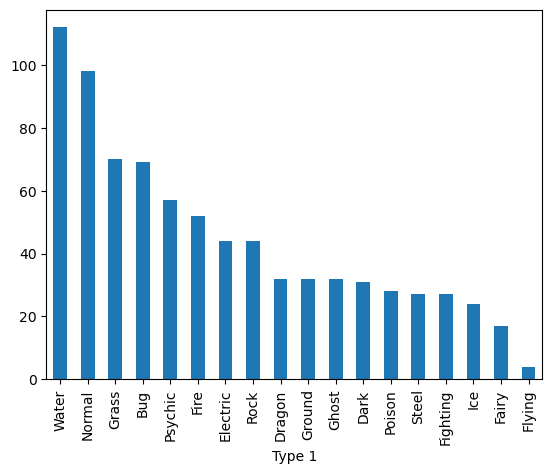

In [211]:
# Univariate analysis on categorical feature
df_pokemon['Type 1'].value_counts().plot.bar()


In [213]:
# From the above plot we find that Water and Normal types are the most common Type 1 pokemon respectively
# But how much % each type takes is not clearly projected hence we go to the next plt

<Axes: xlabel='Type 1'>

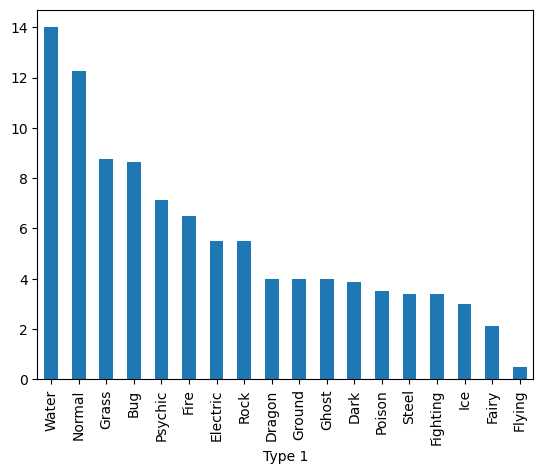

In [217]:
((df_pokemon['Type 1'].value_counts() / len(df_pokemon)) *100).plot.bar()

In [219]:
# From below plot we find that Water type occupies 14% and Normal type occupies 12% of dataset

<Axes: xlabel='Generation'>

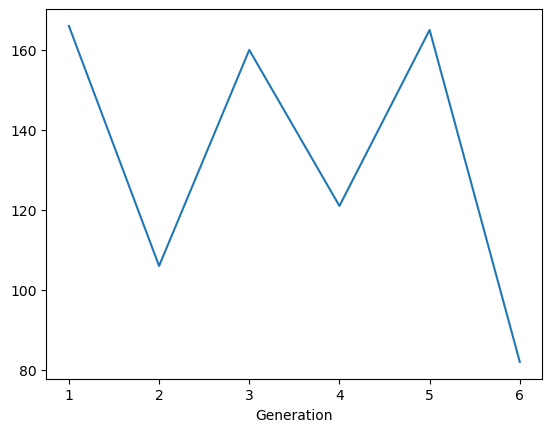

In [225]:
# Univariate analysis on numerical feature
df_pokemon['Generation'].value_counts().sort_index().plot.line()

In [227]:
# From the above plot we can see that there are more number of pokemons in Generation 1, 3, 5 than 2, 4, 6
# Most number of pokemon is in Generation 1 & least number of pokemon is in Generation 6

<Axes: xlabel='[Total]', ylabel='[Speed]'>

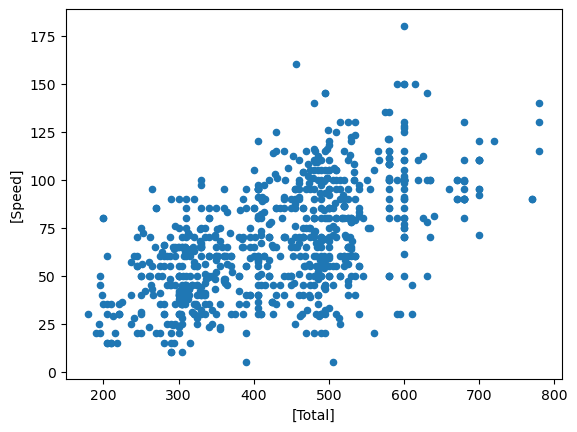

In [231]:
# Bivariate analysis on numerical feature
df_pokemon.plot.scatter(x=['Total'], y=['Speed'])

In [233]:
# Scatter plot plotted for Speed and Total 
# This scatter plots do not effectively treat points which map to the same place
# So, moving to hex plot

<Axes: xlabel='[Total]', ylabel='[Speed]'>

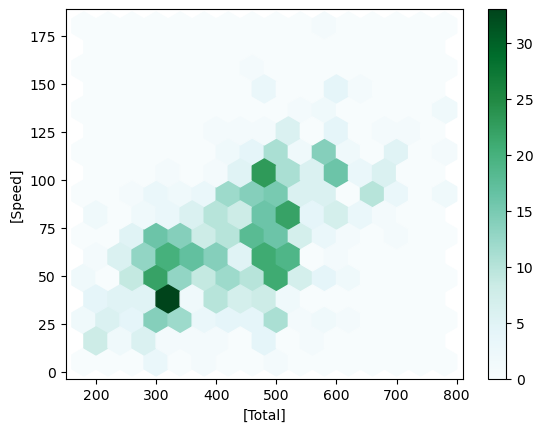

In [237]:
# Hex Plot
df_pokemon.plot.hexbin(x=['Total'], y=['Speed'], gridsize=15)

In [239]:
# The data in above plot is directly comparable with that in the scatter plot from earlier
# but story it tells is very different.

# From this hexplot its evident that the pokemons are clustered around 300 for Total & 25-50 for Speed.
# We didn't see this effect by looking at scatter plot, because too many similar Total & Speed pokemons were overplotted.
# By doing away with this problem, this hexplot presents a much more useful view of the dataset.

# Hexplots & scatter plots can be applied to combinations of interval variables or ordinal categorical variables.

<Axes: xlabel='Generation'>

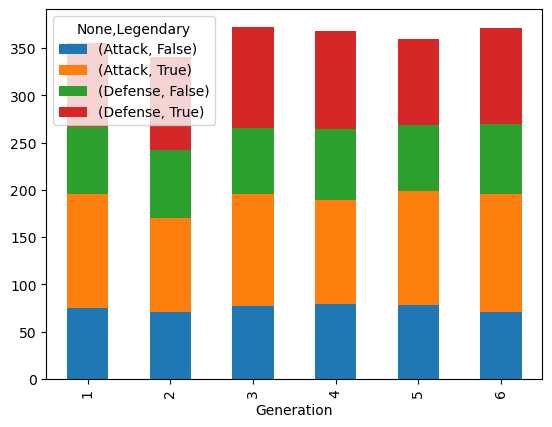

In [251]:
# Bivariate analysis on categorical feature
pok_gen_leg = df_pokemon.groupby(['Generation', 'Legendary'])[['Attack', 'Defense']].mean().unstack()
pok_gen_leg.plot.bar(stacked = True)
# Box plot with 4 features are represented below Generation, Legendary, Attack, Defense
# In general the Defense value is higher than Attack for all pokemons
# Pokemons that aree Legendary has more Attack and Defense powers
# Generations 3 & 6 have more powers than other Generations even if they are Legendary

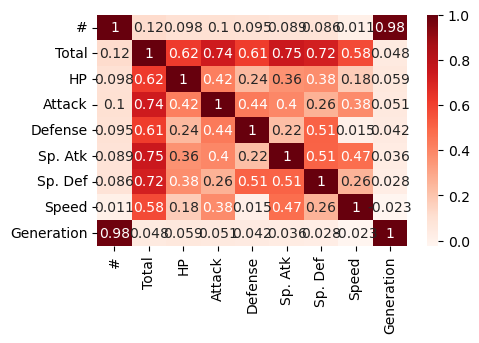

In [255]:
# Multivariate analysis on numerical variable
cor_pokemon = df_pokemon.drop(['Type 1','Type 2','Name','Legendary'], axis = 1)
corr_pokemon = cor_pokemon.corr()
plt.figure(figsize = (5,3))
sns.heatmap(corr_pokemon, annot = True, cmap='Reds')
plt.show()

In [257]:
# From the above histogram the following were the observations
# Total is highly corelated with Attack, Defense, Sp.Atk, Sp.Def
# Speed & Generation is least corelated with other features
# Attack & Defense, Sp.Atk & Sp.Def complements each other respectively

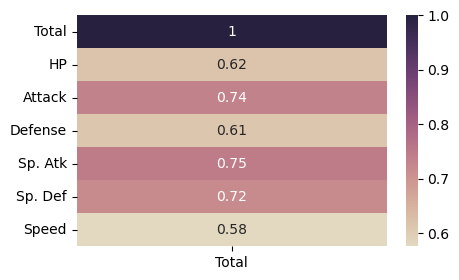

In [269]:
cor_target = abs(corr_pokemon['Total'])
relevant_features = cor_target[cor_target > 0.2]
names = [index for index, value in relevant_features.items()]
plt.figure(figsize = (5,3))
sns.heatmap(relevant_features.to_frame(), annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

plt.show()

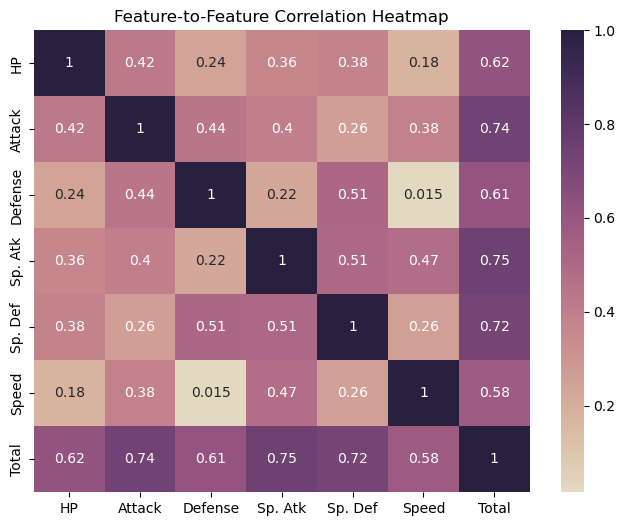

In [277]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
df_subset = df_pokemon[features]

# Compute correlation matrix
corr_matrix = df_subset.corr()

# Plot full heatmap with feature-to-feature correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
plt.title("Feature-to-Feature Correlation Heatmap")
plt.show()

# Histogram removing least corelated feature values

<Axes: xlabel='Generation', ylabel='Total'>

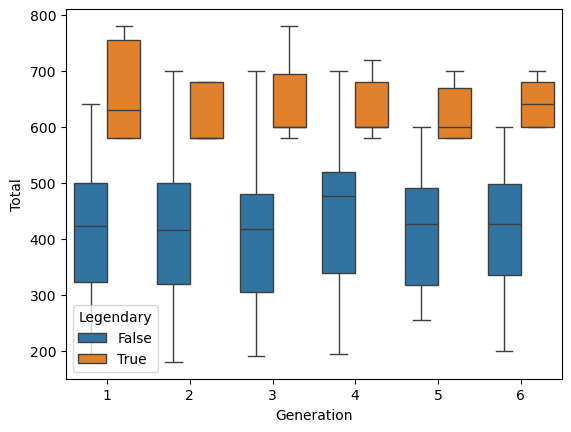

In [281]:
# Multivariate analysis on categorical variable
sns.boxplot(x="Generation", y="Total", hue='Legendary', data=df_pokemon)

In [283]:
# Plotting Box plot for Total and Generation with respect to Legendary.
# If a pokemon is Legendary Total value is always higher than non Legendary pokemons
# In non Legendary pokemons there were many outliers in Total when compared to Legendary pokemons